In [ ]:
"<12장>"
'10p. 퍼셉트론 - sklearn Perceptron 이용'

from sklearn.linear_model import Perceptron

# 샘플과 레이블(AND 학습)
X = [[0,0],[0,1],[1,0],[1,1]]
y = [0, 0, 0, 1]

# 퍼셉트론 생성, tol: 종료 조건, tolerence random_state: 난수의 시드
clf = Perceptron(tol=1e-3, random_state=0)

# 학습
clf.fit(X, y)

# 테스트
print(clf.predict(X))

[0 0 0 1]


[[-169.  473.]] [-3.]
[0 1]


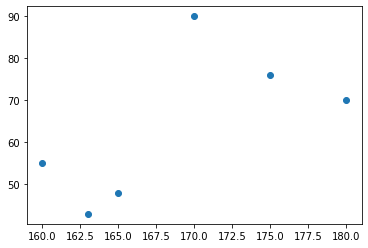

In [ ]:
'15p. Lab: 퍼셉트론으로 분류'

from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
import numpy as np

# X: 키-몸무게, y: 키-몸무게 입력을 0과 1로 분류(2개의 클래스로 분류)
X = [[160, 55], [163, 43], [165, 48], [170, 90], [175, 76], [180, 70]]
y = [0,0,0,1,1,1]

# 퍼셉트론 생성
clf = Perceptron(tol=0.001, random_state=0)
# 훈련
clf.fit(X, y)

# coef(기울기)와 intercept(절편) 출력
print(clf.coef_, clf.intercept_)

# 예측: X값을 입력으로 받아 y를 예측(분류)
print(clf.predict([[168, 50], [160, 60]]))

# numpy array로 변환
npX = np.array(X)  

plt.scatter(npX[:, 0], npX[:, 1])
plt.show()

Epoch 1/30
200/200 [==============================] - 1s 1ms/step - loss: 2.4193 - mse: 2.4193
Epoch 2/30
200/200 [==============================] - 0s 1ms/step - loss: 0.2488 - mse: 0.2488
Epoch 3/30
200/200 [==============================] - 0s 1ms/step - loss: 0.2334 - mse: 0.2334
Epoch 4/30
200/200 [==============================] - 0s 1ms/step - loss: 0.2090 - mse: 0.2090
Epoch 5/30
200/200 [==============================] - 0s 1ms/step - loss: 0.1879 - mse: 0.1879
Epoch 6/30
200/200 [==============================] - 0s 1ms/step - loss: 0.1759 - mse: 0.1759
Epoch 7/30
200/200 [==============================] - 0s 1ms/step - loss: 0.1650 - mse: 0.1650
Epoch 8/30
200/200 [==============================] - 0s 1ms/step - loss: 0.1516 - mse: 0.1516
Epoch 9/30
200/200 [==============================] - 0s 1ms/step - loss: 0.1458 - mse: 0.1458
Epoch 10/30
200/200 [==============================] - 0s 1ms/step - loss: 0.1351 - mse: 0.1351
Epoch 11/30
200/200 [============================

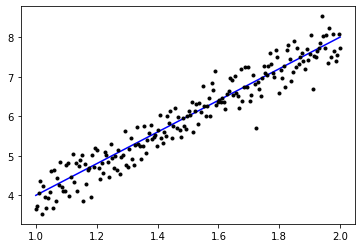

In [ ]:
"<13장>"

#구글 플레이그라운드는 생략

'p.34 Keras 예제 #1 선형 회귀'

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
# 가상적인 데이터 생성
X = data = np.linspace(1,2,200) # 시작값=1, 종료값=2, 개수=200
y = X*4 + np.random.randn(200) * 0.3 # x를 4배로 하고 편차 0.3정도의 가우시안 잡음추가

## 중요-외워야 함
# 모델 생성
model = tf.keras.models.Sequential()    

# 모델에 layer 추가
model.add(tf.keras.layers.Dense(1, input_dim=1, activation='linear'))     # 입력도 1개, 출력도 1개, 활성화함수: linear(선형)

# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])     # optimizer: gd는 그 지디가 아니라 gradient descent(경사하강법)
# sgd->stochastic gradient descent, 예제 실행할 때마다 가중치 변경(평균X) vs batch gradient descent: 예제 다 실행하고 평균내서 가중치 변경
# loss: 손실함수, MSE사용 -> 값이 작을수록 모델이 더 정확함

# 훈련
model.fit(X, y, batch_size=1, epochs=30)      # epochs: 반복횟수

predict = model.predict(data)
plt.plot(data, predict, 'b', data, y, 'k.') # 첫 번째 그래프는 파란색 마커로
plt.show() 

In [ ]:
# 단층 퍼셉트론(퍼셉트론 1개)은 XOR문제를 해결X
# -> 다층 퍼셉트론으로 해결

'p.36 Keras 예제 #2 XOR'

import tensorflow as tf
import numpy as np

X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

model = tf.keras.models.Sequential()
# tf.keras.layers.Dense(): layer에 대해 정의
model.add(tf.keras.layers.Dense(2, input_dim=2, activation='sigmoid'))    # 입력층, 노드 수:2, input_dim(입력으로 들어오는 데이터의 개수, 입력층에 정의), 활성화함수:시그모이드
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))                 # 노드 수: 1
sgd = tf.keras.optimizers.SGD(lr=0.1)                                     # lr: leraning rate, 학습률
model.compile(loss='mean_squared_error', optimizer=sgd)                   # loss: mse, optimizer sgd사용
model.fit(X, y, batch_size=1, epochs=5000, verbose=0)                     # verbose=0이면 간략히 결과만 출력
print(model.predict(X))


1/1 [==============================] - 0s 55ms/step
[[0.07026777]
 [0.94061214]
 [0.9382811 ]
 [0.06210007]]


In [ ]:
'p.39 Lab: MLP를 사용한 MNIST 숫자인식'

# MNIST: 숫자 손글씨 데이터셋

import tensorflow as tf
batch_size = 128      # 가중치를 변경하기 전에 처리하는 샘플의 개수
num_classes = 10      # 출력 클래스
epochs = 20           # 에포크

# MNIST 데이터를 load하고 훈련데이터/테스트데이터 나눔
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# reshape(): 입력 이미지를 2차원(28x28) -> 1차원 벡터(784)로 변경, 이걸 flatten이라고 함
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

# 입력값의 타입을 float로 변경
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# 클래스의 개수에 따라서 하나의 출력 픽셀만이 1이 되게 한다.
# 예를 들면 1 0 0 0 0 0 0 0 0 0과 같다.
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)
# 신경망의 모델을 구축한다.
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(512, activation='ReLU', input_shape=(784,)))
model.add(tf.keras.layers.Dense(num_classes, activation='ReLU'))
model.summary()
sgd = tf.keras.optimizers.SGD(lr=0.1)

# 손실 함수를 제곱 오차 함수로 설정하고 학습 알고리즘은 SGD 방식으로 한다.
model.compile(loss='mean_squared_error',
              optimizer=sgd,
              metrics=['accuracy'])
# 학습을 수행한다.
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs)
# 학습을 평가한다.
score = model.evaluate(x_test, y_test, verbose=0)
print('테스트 손실값:', score[0])
print('테스트 정확도:', score[1])

11490434/11490434 [==============================] - 1s 0us/step
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 512)               401920    
                                                                 
 dense_6 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0892 - accuracy: 0.2810
Epoch 2/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0832 - accuracy: 0.4396
Epoch 3/20
469/469 [==============================] - 4s 8ms/step - loss: 0.0774 - accuracy: 0.5461
Epoch 4/20
469/469 [==============================] - 4s 8ms/step - loss: 0.07